# Exercise
1) Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2) Figure out if any preprocessing such as scaling would help here
3) Draw elbow plot and from that figure out optimal value of k

# Steps to KMeans
1) import data
2) select only two columns
3) plot a normal graph to see how it look before clustering
4) now 'import KMeans' from 'sklearn.cluster'
5) set 'n_splits'
6) then make new column of cluster in df to group all datapoints
7) It will group like in array ex: [000,111,222]
8) plot scatter with them
# Ploting Elbow technique

In [89]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
iris = load_iris()

In [90]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [91]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['flower'] = iris.target

In [92]:
df1 = df.drop(['sepal length (cm)','sepal width (cm)','flower'],axis='columns')

In [93]:
df1.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [94]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df)
y_predicted

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [95]:
df1['clusters'] = y_predicted

In [96]:
df1

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [97]:
#Now Grouping them as Clusters
df2 = df[df1.clusters==0]
df3 = df[df1.clusters==2]
df4 = df[df1.clusters==1]

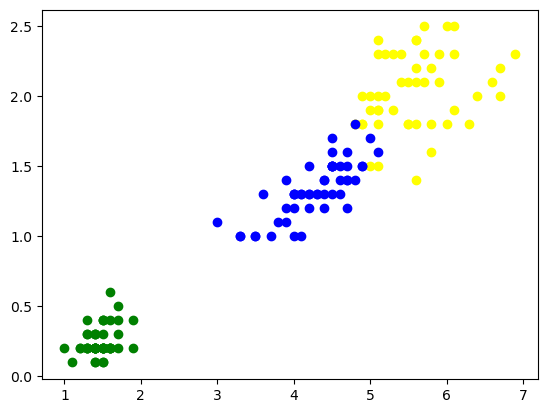

In [88]:
#Visualising our Groups of clusters with the Scatter graph
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='yellow')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],color='green')

In [100]:
sse = []
k_range = range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df1)
    sse.append(km.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [101]:
sse

[650.8686666666666,
 186.3605109922757,
 32.33506922769108,
 22.880081513541867,
 14.574438882295826,
 11.719777232351566,
 9.592909175111693,
 8.036793233082708,
 7.023801780091255]

Text(0, 0.5, 'Square Error')

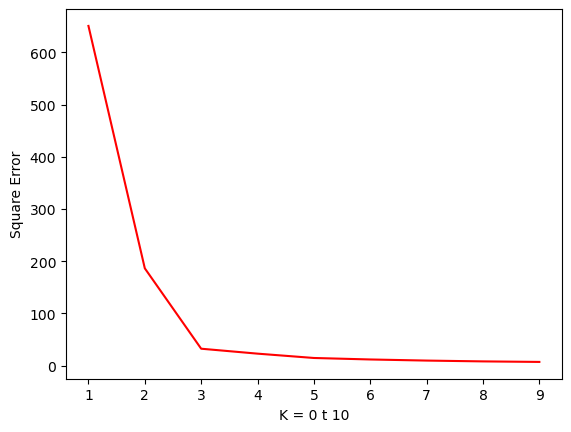

In [105]:
plt.plot(k_range,sse,color='red')
plt.xlabel("K = 0 t 10")
plt.ylabel("Square Error")